In [12]:
import dwong
import uproot3 as uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import os,sys
import math
from sklearn.cluster import Birch#clustering
from scipy import spatial
import scipy.stats as sp
from shapely.geometry import Point, Polygon
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
def show_cluster(x,y,eng):
    x_bins = np.linspace(-150, 150, 50)
    y_bins = np.linspace(-150, 150, 50)
    bin_means = binned_statistic_2d(x, y, eng, statistic='mean',bins=[x_bins, y_bins])
    im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-150, 150, -150, 150), aspect='auto')
    #cax = plt.axes([.95, .15, .075, .7])
    #plt.colorbar(cax=cax)
    plt.colorbar(im, label='Energy deposite/GeV')
    #plt.clim(0.,1.)
    plt.xlabel('EMCal x Position/cm')
    plt.ylabel('EMCal y Position/cm')
    plt.show()

In [ ]:
def plotEnergy(self):
        # weighted
        fig = plt.figure(figsize=(8,6))
        emcal = EMCal()
        plt.hist2d(np.array(self.cells_x),np.array(self.cells_y), bins=[int(self.emcal.binsx/self.emcal.sizex),int(self.emcal.binsy/self.emcal.sizey)], range=[self.emcal.ecalx,self.emcal.ecaly], weights=np.array(self.cells_e)*1e3, density=False, norm=colors.LogNorm())
        plt.xlabel("EMCal X [cm]")
        plt.ylabel("EMCal Y [cm]")
        cbar=plt.colorbar()
        cbar.set_label('Energy Deposit [MeV]')
        #plt.title("Energy Deposits for "+self.Type+": "+self.Mass+" \n Event "+str(self.evtNum))
        plt.show()

Optimal number of clusters (Silhouette Score): 4


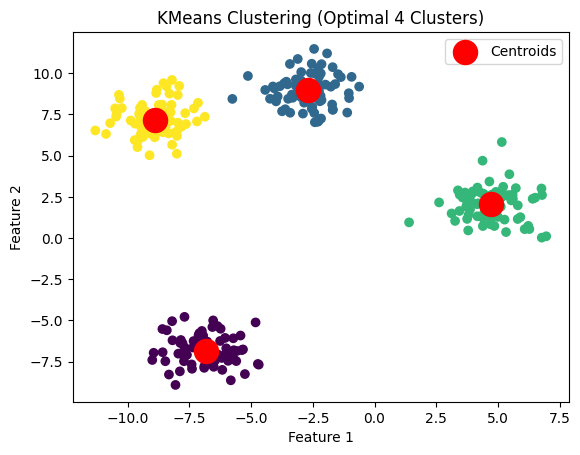

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate a synthetic dataset with 2D points and 4 clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Determine the optimal number of clusters using Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print("Optimal number of clusters (Silhouette Score):", optimal_n_clusters)

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title(f'KMeans Clustering (Optimal {optimal_n_clusters} Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [18]:
file1='/Users/wongdowling/Desktop/n-tuples/aprime_yongbin/Aee_test_eps9.root'
x, y, eng=dwong.emcal_bytuple(file1)

In [19]:
def emcal_eng(x, y, eng):
    x_bins = np.linspace(-150, 150, 50)
    y_bins = np.linspace(-150, 150, 50)
    bin_means = binned_statistic_2d(x, y, eng, statistic='mean', bins=[x_bins, y_bins])
    
    fig, ax = plt.subplots()
    im = ax.imshow(np.flip(bin_means.statistic.T, 0), extent=(-150, 150, -150, 150), aspect='auto')
    plt.colorbar(im, ax=ax, label='Energy Deposit/GeV')
    ax.set_xlabel('EMCal x Position/cm')
    ax.set_ylabel('EMCal y Position/cm')
    
    return fig


In [20]:
pdf_filename = 'Aee_9_emcal_plots.pdf'
pdf_pages = PdfPages(pdf_filename)
for i in range(len(x)):
    fig = emcal_eng(x[i],y[i],eng[i])
    pdf_pages.savefig(fig)
    plt.close(fig)  
pdf_pages.close()

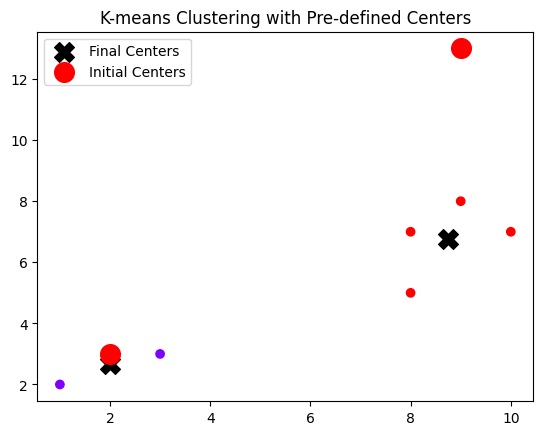

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data points
data = np.array([
    [2, 3],
    [3, 3],
    [1, 2],
    [8, 7],
    [9, 8],
    [10, 7],
    [8, 5]
])

# Pre-defined cluster centers
initial_centers = np.array([
    [2, 3],  # Center 1
    [9, 13]   # Center 2
])

# Initialize K-means with pre-defined centers
kmeans = KMeans(n_clusters=initial_centers.shape[0], init=initial_centers, n_init=1)
kmeans.fit(data)

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Get the final cluster centers
final_centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='rainbow')
plt.scatter(final_centers[:, 0], final_centers[:, 1], marker='X', s=200, c='black', label='Final Centers')
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], marker='o', s=200, c='red', label='Initial Centers')
plt.legend()
plt.title('K-means Clustering with Pre-defined Centers')
plt.show()


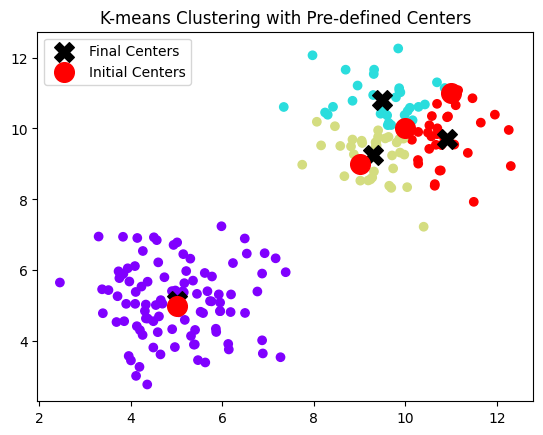

In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate random data points in two clusters
np.random.seed(0)
cluster1 = np.random.randn(100, 2) + np.array([5, 5])
cluster2 = np.random.randn(100, 2) + np.array([10, 10])

# Combine the data points into one dataset
data = np.vstack([cluster1, cluster2])

# Pre-defined cluster centers
initial_centers = np.array([
    [5, 5],    # Center 1
    [10, 10],   # Center 2
    [9, 9],
    [11, 11]
])

# Initialize K-means with pre-defined centers
kmeans = KMeans(n_clusters=initial_centers.shape[0], init=initial_centers, n_init=1)
kmeans.fit(data)

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Get the final cluster centers
final_centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='rainbow')
plt.scatter(final_centers[:, 0], final_centers[:, 1], marker='X', s=200, c='black', label='Final Centers')
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], marker='o', s=200, c='red', label='Initial Centers')
plt.legend()
plt.title('K-means Clustering with Pre-defined Centers')
plt.show()


In [5]:
initial_centers

array([[ 5,  5],
       [10, 10],
       [ 9,  9],
       [11, 11]])